In [1]:
import pandas as pd
import numpy as np

In [20]:
data=pd.read_csv('/content/BostonHousing.csv')

In [21]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [23]:
print("\nMissing values in each column:")
print(data.isnull().sum())

data['rm'].fillna(data['rm'].mean(), inplace=True)

print("\nAfter filling missing values with the mean:")
print(data.isnull().sum())


Missing values in each column:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

After filling missing values with the mean:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


<ipython-input-23-0141610711f6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rm'].fillna(data['rm'].mean(), inplace=True)


In [24]:
duplicate_value=data.duplicated().sum()
duplicate_value

0

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
Scaler=StandardScaler()

In [28]:
normalization=Scaler.fit_transform(data)

In [29]:
normalization

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833, -1.15724782]])

In [30]:
x=data.drop('medv',axis=1)
y=data['medv']

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
model=LinearRegression()

In [70]:
from sklearn.metrics import mean_squared_error

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print("MSE " ,mse_test)
rmse_test = np.sqrt(mse_test)
print("RMSE ", rmse_test)

MSE  24.404825188146287
RMSE  4.940124005340988


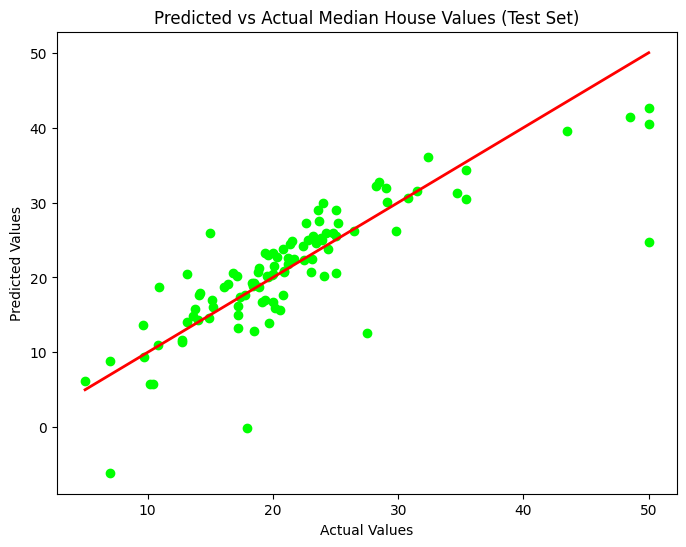

In [74]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='lime')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Predicted vs Actual Median House Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

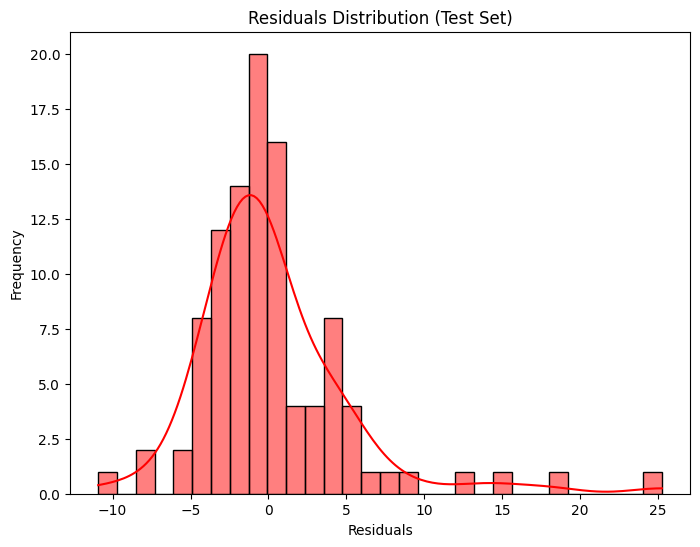

In [75]:
plt.figure(figsize=(8, 6))
sns.histplot(y_test - y_pred_test, bins=30, kde=True , color='red')
plt.title('Residuals Distribution (Test Set)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

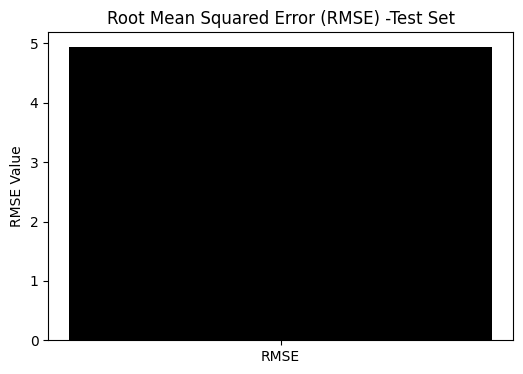

In [77]:
plt.figure(figsize=(6, 4))
plt.bar(['RMSE'], [rmse_test], color='black')
plt.title('Root Mean Squared Error (RMSE) -Test Set')
plt.ylabel('RMSE Value')
plt.show()

In [83]:
y_predict=model.predict(X_test)
y_predict

array([28.98141872, 36.01423173, 14.82430919, 25.0229357 , 18.77077366,
       23.25088901, 17.65921355, 14.3312157 , 23.01799598, 20.61923725,
       24.91477542, 18.65745019, -6.08024872, 21.75669434, 19.23608436,
       26.18483638, 20.65521785,  5.80089206, 40.48814091, 17.61519761,
       27.23332555, 30.05317191, 11.3328674 , 24.1383693 , 17.86296594,
       15.84437533, 22.77843276, 14.57521147, 22.4366747 , 19.18599316,
       22.42492941, 25.20638527, 25.92633141, 17.7144719 , 16.77105313,
       16.96804968, 31.22105015, 20.12198187, 23.76217047, 24.62043216,
       13.93268126, 32.23349827, 42.65936186, 17.32784863, 27.25487922,
       16.99795581, 14.06061007, 25.89028965, 20.29789589, 29.94485087,
       21.30603148, 34.33630976, 16.03389489, 26.20109252, 39.52390271,
       22.58297123, 18.84703823, 32.71222177, 25.05158461, 12.90043059,
       20.56663412, 30.48440628, 31.50592444, 15.8863132 , 20.23931509,
       16.71637229, 20.52048882, 25.95211452, 30.60472918, 11.60